# Logistic Regression

### Problem Statement :-
    - Whether the clinet has subscribed a term deposit or not 

### Data Cleaning and Processing

Importing warnings to avoid warning on the notebook

In [119]:
import warnings
warnings.filterwarnings ('ignore')

Let's import pandas and numpy 

In [120]:
import pandas as pd
import numpy as np

Reading the dataset

In [121]:
deposit = pd.read_csv("~/desktop/Digi 360/Module 8/bank_data.csv")
deposit.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


Finding the null values in the dataset

In [122]:
deposit.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

Let's see the datatypes of dataset whether all are with proper datatype

In [123]:
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
age                45211 non-null int64
default            45211 non-null int64
balance            45211 non-null int64
housing            45211 non-null int64
loan               45211 non-null int64
duration           45211 non-null int64
campaign           45211 non-null int64
pdays              45211 non-null int64
previous           45211 non-null int64
poutfailure        45211 non-null int64
poutother          45211 non-null int64
poutsuccess        45211 non-null int64
poutunknown        45211 non-null int64
con_cellular       45211 non-null int64
con_telephone      45211 non-null int64
con_unknown        45211 non-null int64
divorced           45211 non-null int64
married            45211 non-null int64
single             45211 non-null int64
joadmin.           45211 non-null int64
joblue.collar      45211 non-null int64
joentrepreneur     45211 non-null int64
johousemaid

In [124]:
deposit.shape

(45211, 32)

Let's describe the dataset how the data is distributed in the range

In [125]:
deposit.describe(percentiles = [0.75, 0.90, 0.95, 0.97, 0.99, 0.995])

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,56.000000,0.000000,3574.000000,1.000000,1.000000,548.000000,5.000000,185.000000,2.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
95%,59.000000,0.000000,5768.000000,1.000000,1.000000,751.000000,8.000000,317.000000,3.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
97%,60.000000,0.000000,7777.900000,1.000000,1.000000,914.700000,10.000000,349.000000,5.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
99%,71.000000,1.000000,13164.900000,1.000000,1.000000,1269.000000,16.000000,370.000000,8.900000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000


By looking at the max values, we can clearly see there are some outliers. Let's confirm with histograms

<Figure size 1152x1080 with 0 Axes>

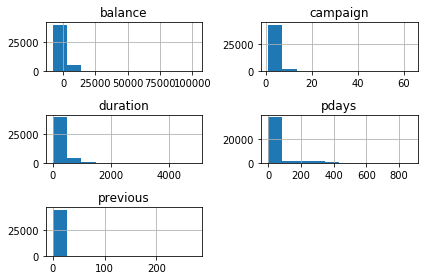

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,15))
deposit.hist(column=["balance", "campaign", "previous", "pdays", "duration"])
plt.tight_layout()
plt.show()

Let's remove the outliers greater than 97%

In [127]:
temp1 = deposit[deposit.balance < np.percentile(deposit.balance,99)]
temp2 = temp1[temp1.previous < np.percentile(temp1.previous,99)]
temp3 = temp2[temp2.duration < np.percentile(temp2.duration,99)]
temp4 = temp3[temp3.campaign < np.percentile(temp3.campaign,99)]
trm_dep = temp4[temp4.pdays < np.percentile(temp4.pdays,99)]
trm_dep.shape

(42963, 32)

<Figure size 1152x1080 with 0 Axes>

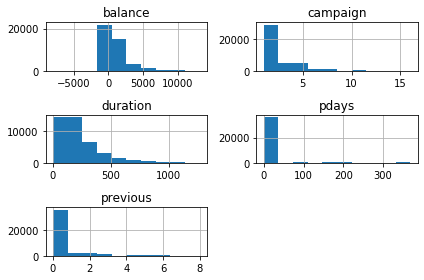

In [128]:
plt.figure(figsize=(16,15))
trm_dep.hist(column=["balance", "campaign", "previous", "pdays", "duration"])
plt.tight_layout()
plt.show()

From above histograms we can see that outliers have been successfully removed.

### Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

X = trm_dep.drop(['y'], axis = 1)
X.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
y = trm_dep ['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [131]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size =0.3, random_state = 100)

### Feature Scaling

SInce there are some features are distributes to high ranges compared to binary varibles, let's do scaling using normalization

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

X_train[['balance','campaign','pdays','age','duration','previous']] = scaler.fit_transform(X_train[['balance','campaign','pdays','age','duration','previous']])

X_train.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
count,3.007400e+04,30074.000000,3.007400e+04,30074.000000,30074.000000,3.007400e+04,3.007400e+04,3.007400e+04,3.007400e+04,30074.000000,...,30074.000000,30074.000000,30074.000000,30074.000000,30074.000000,30074.000000,30074.000000,30074.000000,30074.000000,30074.000000
mean,-1.827287e-16,0.018288,-2.828717e-17,0.557226,0.161801,9.428442e-18,-1.197456e-16,-4.996262e-16,2.068088e-15,0.100219,...,0.032819,0.027233,0.205693,0.049212,0.035080,0.092937,0.021248,0.167454,0.029128,0.006650
std,1.000017e+00,0.133994,1.000017e+00,0.496723,0.368274,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.300297,...,0.178166,0.162764,0.404214,0.216314,0.183985,0.290350,0.144211,0.373387,0.168168,0.081279
min,-2.167969e+00,0.000000,-4.781757e+00,0.000000,0.000000,-1.153183e+00,-6.943805e-01,-3.989022e-01,-3.605034e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.496183e-01,0.000000,-5.597543e-01,0.000000,0.000000,-6.673903e-01,-6.943805e-01,-3.989022e-01,-3.605034e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.822781e-01,0.000000,-3.712394e-01,1.000000,0.000000,-3.136577e-01,-2.489758e-01,-3.989022e-01,-3.605034e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.687323e-01,0.000000,1.144084e-01,1.000000,0.000000,3.183446e-01,1.964289e-01,-3.989022e-01,-3.605034e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.112898e+00,1.000000,6.280047e+00,1.000000,1.000000,4.831973e+00,5.986690e+00,3.751164e+00,6.444316e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the collinearity

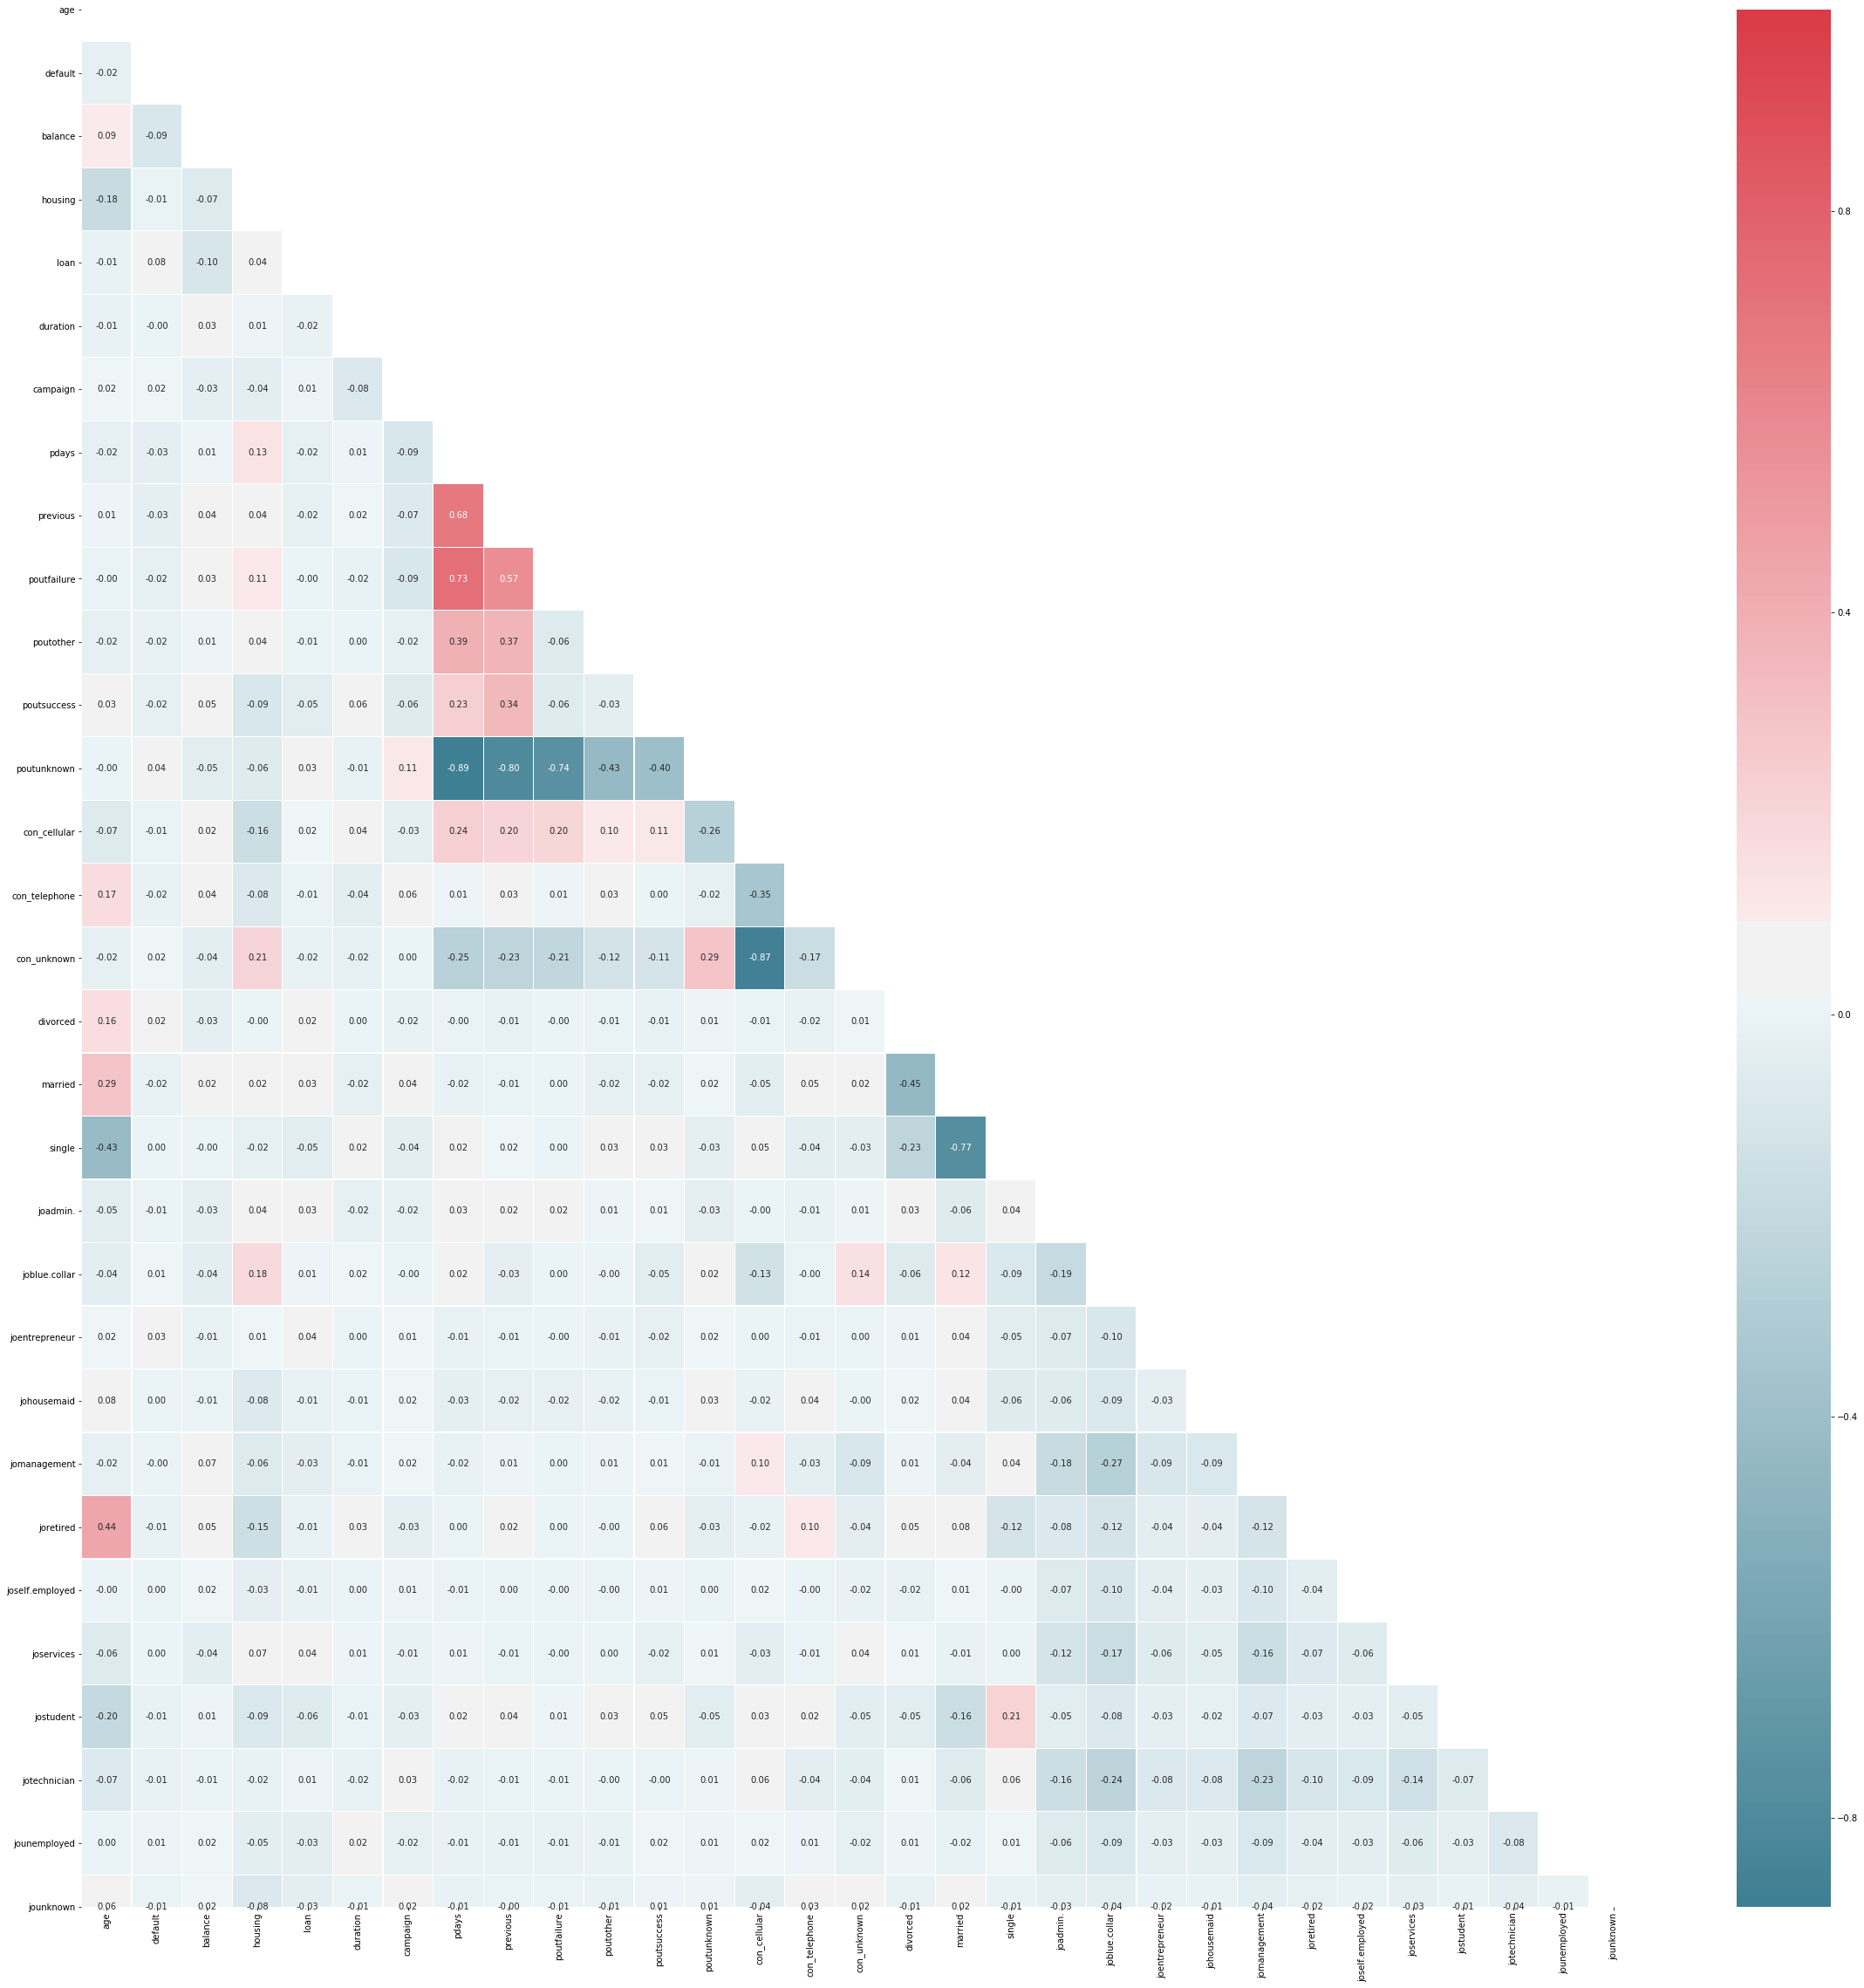

In [134]:
import seaborn as sns
corr = X_train.corr()
fig, ax = plt.subplots(figsize=(40,40))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()

### Building the first training model

In [135]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30074
Model:                            GLM   Df Residuals:                    30046
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6990.6
Date:                Sun, 12 Apr 2020   Deviance:                       13981.
Time:                        13:43:24   Pearson chi2:                 2.33e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7148      0.045    -

There are few features have insignificant p value and its hard to drop single varibale at a time and rebuild the model. So, let's use Recursive Feature Elimination to select the top features

### Feature selection using RFE

In [136]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [137]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [138]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False, False, False])

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 17),
 ('default', False, 16),
 ('balance', False, 11),
 ('housing', True, 1),
 ('loan', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', False, 15),
 ('poutfailure', True, 1),
 ('poutother', True, 1),
 ('poutsuccess', True, 1),
 ('poutunknown', True, 1),
 ('con_cellular', False, 9),
 ('con_telephone', False, 10),
 ('con_unknown', True, 1),
 ('divorced', False, 8),
 ('married', False, 2),
 ('single', False, 14),
 ('joadmin.', False, 12),
 ('joblue.collar', True, 1),
 ('joentrepreneur', True, 1),
 ('johousemaid', True, 1),
 ('jomanagement', False, 13),
 ('joretired', True, 1),
 ('joself.employed', False, 3),
 ('joservices', False, 5),
 ('jostudent', True, 1),
 ('jotechnician', False, 6),
 ('jounemployed', False, 7),
 ('jounknown', False, 4)]

In [140]:
col = X_train.columns[rfe.support_]

In [141]:
X_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'previous', 'con_cellular',
       'con_telephone', 'divorced', 'married', 'single', 'joadmin.',
       'jomanagement', 'joself.employed', 'joservices', 'jotechnician',
       'jounemployed', 'jounknown'],
      dtype='object')

### Re-building the model with top 15 varibles

In [142]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                30074
Model:                            GLM   Df Residuals:                    30059
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7035.8
Date:                Sun, 12 Apr 2020   Deviance:                       14072.
Time:                        13:43:45   Pearson chi2:                 2.35e+04
No. Iterations:                    29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7133      0.051    -13.

### Pedecting the values on train set 

In [143]:
# Getting the predicted probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8047     0.007360
19594    0.084627
19267    0.068501
38950    0.036131
28237    0.706895
2010     0.008981
4547     0.020338
28833    0.194157
4199     0.453318
35038    0.020461
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00736008, 0.08462706, 0.06850138, 0.03613124, 0.70689462,
       0.00898099, 0.02033769, 0.19415708, 0.45331788, 0.02046111])

Creating a dataframe with the actual y and the predicted probabilities

In [145]:
y_train_pred_final = pd.DataFrame({'y':y_train.values, 'y_Prob':y_train_pred})
y_train_pred_final.head()

,y,y_Prob
0,0,0.007360
1,0,0.084627
2,0,0.068501
3,0,0.036131
4,1,0.706895


Creating new column 'predicted' with 1 if y_Prob > 0.5 else 0

In [146]:
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,y,y_Prob,predicted
0,0,0.007360,0
1,0,0.084627,0
2,0,0.068501,0
3,0,0.036131,0
4,1,0.706895,1


In [147]:
y_train_pred_final.predicted.value_counts()

0    28372
1     1702
Name: predicted, dtype: int64

In [148]:
from sklearn import metrics

In [149]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

[[26188   620]
 [ 2184  1082]]


In [1]:
# Predicted     not_sub    subscribe
# Actual
# not_sub         26188      620
# subscribe       2184       1082  

In [151]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9067633171510274


Let's check the VIF and rebuild the model if any feature is collinear

In [152]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,pdays,5.32
8,poutunknown,3.82
5,poutfailure,3.60
6,poutother,1.80
7,poutsuccess,1.31
9,con_unknown,1.17
0,housing,1.16
10,joblue.collar,1.09
13,joretired,1.05
14,jostudent,1.03


Since VIF is less than or approxiamtely 5 for all features, we can stop building the model. 

### ROC Curve

Let's plot ROC curve to see our model is good enough

In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.y, y_train_pred_final.y_Prob, drop_intermediate = False )

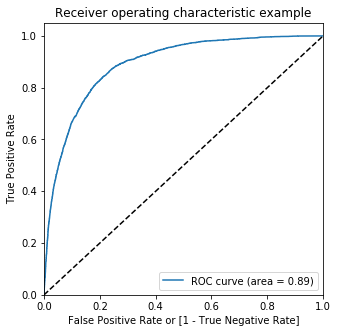

In [157]:
draw_roc(y_train_pred_final.y, y_train_pred_final.y_Prob)

### Finding Optimal Cut off point using Precision and Recall

Precision

TP / TP + FP

In [158]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

#We can use below code as well

#from sklearn.metrics import precision_score, recall_score
#precision_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.63572267920094

Recall

TP / TP + FN

In [159]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

#We can use below code as well

#recall_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.3312921004286589

### Precision and Recall Trade Off

In [160]:
from sklearn.metrics import precision_recall_curve

In [161]:
y_train_pred_final.y, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        1
         ..
 30069    0
 30070    0
 30071    0
 30072    0
 30073    1
 Name: y, Length: 30074, dtype: int64, 0        0
 1        0
 2        0
 3        0
 4        1
         ..
 30069    0
 30070    0
 30071    0
 30072    0
 30073    0
 Name: predicted, Length: 30074, dtype: int64)

In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.y, y_train_pred_final.y_Prob)

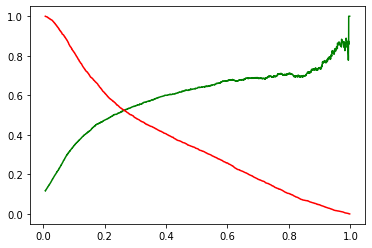

In [163]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the above plot we can see that the optimal cut off is 0.25

### Making Predictions on Test Set

In [165]:
X_test[['balance','campaign','pdays','age','duration','previous']] = scaler.fit_transform(X_test[['balance','campaign','pdays','age','duration','previous']])

In [166]:
X_test.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
count,1.288900e+04,12889.000000,1.288900e+04,12889.000000,12889.000000,1.288900e+04,1.288900e+04,1.288900e+04,1.288900e+04,12889.000000,...,12889.000000,12889.000000,12889.000000,12889.00000,12889.000000,12889.000000,12889.000000,12889.000000,12889.000000,12889.000000
mean,1.016764e-16,0.018310,-8.126511e-17,0.551478,0.161843,-2.450605e-17,-4.328655e-16,3.889097e-17,-4.550545e-16,0.101870,...,0.033672,0.029250,0.208084,0.05175,0.033672,0.092792,0.019319,0.170067,0.027465,0.005897
std,1.000039e+00,0.134076,1.000039e+00,0.497362,0.368321,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,0.302489,...,0.180391,0.168512,0.405953,0.22153,0.180391,0.290152,0.137648,0.375707,0.163441,0.076565
min,-2.152139e+00,0.000000,-2.341516e+00,0.000000,0.000000,-1.160291e+00,-7.066584e-01,-4.009077e-01,-3.599646e-01,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.397657e-01,0.000000,-5.742472e-01,0.000000,0.000000,-6.729117e-01,-7.066584e-01,-4.009077e-01,-3.599646e-01,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.748162e-01,0.000000,-3.750449e-01,1.000000,0.000000,-3.073774e-01,-2.514345e-01,-4.009077e-01,-3.599646e-01,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.726079e-01,0.000000,1.245253e-01,1.000000,0.000000,3.252781e-01,2.037894e-01,-4.009077e-01,-3.599646e-01,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.627254e+00,1.000000,6.248693e+00,1.000000,1.000000,4.753867e+00,6.121700e+00,3.773867e+00,6.277494e+00,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
X_test = X_test[col]
X_test.head()

,housing,loan,duration,campaign,pdays,poutfailure,poutother,poutsuccess,poutunknown,con_unknown,joblue.collar,joentrepreneur,johousemaid,joretired,jostudent
23173,0,0,1.693689,4.756028,-0.400908,0,0,0,1,0,0,0,0,0,0
11537,0,0,0.198747,-0.706658,-0.400908,0,0,0,1,1,0,0,1,0,0
19107,0,0,-0.372986,0.203789,-0.400908,0,0,0,1,0,0,0,0,0,0
36381,1,0,-0.002765,1.569461,-0.400908,0,0,0,1,0,0,0,0,0,0
7819,1,0,0.039412,1.569461,-0.400908,0,0,0,1,1,0,0,0,0,0


In [168]:
X_test_sm = sm.add_constant(X_test)

### Making Predictions on Test set

In [169]:
y_test_pred = res.predict(X_test_sm)

In [170]:
y_test_pred[:10]

23173    0.153230
11537    0.031673
19107    0.076031
36381    0.034823
7819     0.010776
39604    0.072979
20550    0.099372
7975     0.005695
26711    0.007427
19988    0.044772
dtype: float64

In [171]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [172]:
# Let's see the head
y_pred_1.head()

,0
23173,0.153230
11537,0.031673
19107,0.076031
36381,0.034823
7819,0.010776


In [173]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [174]:
y_test_df.head()

,y
23173,1
11537,0
19107,0
36381,0
7819,0


In [175]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [176]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [177]:
y_pred_final.head()

,y,0
0,1,0.153230
1,0,0.031673
2,0,0.076031
3,0,0.034823
4,0,0.010776


In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'y_Prob'})

In [179]:
y_pred_final.head()

,y,y_Prob
0,1,0.153230
1,0,0.031673
2,0,0.076031
3,0,0.034823
4,0,0.010776


In [180]:
y_pred_final['final_predicted'] = y_pred_final.y_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [181]:
y_pred_final.head()

,y,y_Prob,final_predicted
0,1,0.153230,0
1,0,0.031673,0
2,0,0.076031,0
3,0,0.034823,0
4,0,0.010776,0


In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.y, y_pred_final.final_predicted)

0.8949491814725735

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.y, y_pred_final.final_predicted)
confusion2

array([[10772,   699],
       [  655,   763]])

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision and Recall on Test set

In [185]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.y, y_pred_final.final_predicted)

0.5218878248974008

In [186]:
recall_score(y_pred_final.y, y_pred_final.final_predicted)

0.5380818053596615

### Conclusion

Hence, the no. of customers to be focused upon for term deposits by the bank are predicted successfully using logistic regression model with an accuracy of 89% approximately.